In [1]:
import numpy as np

In [4]:
0.483+(1.0/0.483+1.0/0.356)**-1

0.6879439809296781

In [17]:
T_i_3leg = np.array([
[1, 1, -0.576, -0.576, -0.424, -0.424],
[1, 1, -0.576, -0.576, -0.424, -0.424],
[-0.576, -0.576, 1.152, 1.152, 1.152,-0.576,-0.576],
[-0.576, -0.576, 1.152, 1.152, 1.152,-0.576,-0.576],
[-0.424, -0.424, -0.576, -0.576, 1, 1],
[-0.424, -0.424, -0.576, -0.576, 1, 1.]])

T_i_5leg = np.array([
[ 1.0, 1.0, -0.5, -0.5, 0.0, 0.0],
[ 1.0, 1.0, -0.5, -0.5, 0.0, 0.0],
[-0.5,-0.5,  1.0,  1.0,-0.5,-0.5],
[-0.5,-0.5,  1.0,  1.0,-0.5,-0.5],
[ 0.0, 0.0, -0.5, -0.5, 1.0, 1.0],
[ 0.0, 0.0, -0.5, -0.5, 1.0, 1.0]])


In [247]:
S_n = 300.0e3
Freq = 60.0
Omega = 2*np.pi*Freq
I_U_avg  = 0.911 # 5-Leg
P_U = 2.5 # 5-Leg
I_mag_pu = 0.02
R_cc_pu = 0.01
X_cc_pu = 0.1
epsilon = np.abs(I_U_avg/I_mag_pu)

P_nl_loss = 1050.0
P_nl_loss_pu = P_nl_loss/S_n

c = epsilon**2*P_nl_loss_pu/P_U
k = np.sqrt((epsilon**2-c**2)/Omega**2)

In [248]:
k

0.12057920284433477

In [401]:
Z_prim_pu = (c+k*Omega*1j)*T_i_5leg + np.eye(6)*R_cc_pu*0.5 + 1j*np.eye(6)*X_cc_pu*0.5

In [402]:
Z_prim_pu

array([[ 2.90972350+45.50728854j,  2.90472350+45.45728854j,
        -1.45236175-22.72864427j, -1.45236175-22.72864427j,
         0.00000000 +0.j        ,  0.00000000 +0.j        ],
       [ 2.90472350+45.45728854j,  2.90972350+45.50728854j,
        -1.45236175-22.72864427j, -1.45236175-22.72864427j,
         0.00000000 +0.j        ,  0.00000000 +0.j        ],
       [-1.45236175-22.72864427j, -1.45236175-22.72864427j,
         2.90972350+45.50728854j,  2.90472350+45.45728854j,
        -1.45236175-22.72864427j, -1.45236175-22.72864427j],
       [-1.45236175-22.72864427j, -1.45236175-22.72864427j,
         2.90472350+45.45728854j,  2.90972350+45.50728854j,
        -1.45236175-22.72864427j, -1.45236175-22.72864427j],
       [ 0.00000000 +0.j        ,  0.00000000 +0.j        ,
        -1.45236175-22.72864427j, -1.45236175-22.72864427j,
         2.90972350+45.50728854j,  2.90472350+45.45728854j],
       [ 0.00000000 +0.j        ,  0.00000000 +0.j        ,
        -1.45236175-22.72864427j, -

In [403]:
Y_prim_pu = np.linalg.inv(Z_prim_pu)

In [404]:
Y_prim_pu

array([[  9.90623714e-01 -9.90919548e+00j,
         -9.89574306e-01 +9.89278472e+00j,
          3.49661306e-04 -5.46522171e-03j,
          3.49661306e-04 -5.46522171e-03j,
          1.74788307e-04 -2.73110193e-03j,
          1.74788307e-04 -2.73110193e-03j],
       [ -9.89574306e-01 +9.89278472e+00j,
          9.90623714e-01 -9.90919548e+00j,
          3.49661306e-04 -5.46522171e-03j,
          3.49661306e-04 -5.46522171e-03j,
          1.74788307e-04 -2.73110193e-03j,
          1.74788307e-04 -2.73110193e-03j],
       [  3.49661306e-04 -5.46522171e-03j,
          3.49661306e-04 -5.46522171e-03j,
          9.90798502e-01 -9.91192658e+00j,
         -9.89399518e-01 +9.89005362e+00j,
          3.49661306e-04 -5.46522171e-03j,
          3.49661306e-04 -5.46522171e-03j],
       [  3.49661306e-04 -5.46522171e-03j,
          3.49661306e-04 -5.46522171e-03j,
         -9.89399518e-01 +9.89005362e+00j,
          9.90798502e-01 -9.91192658e+00j,
          3.49661306e-04 -5.46522171e-03j,
        

### Incidence Matrix

In [554]:
id_nodes = np.array(['a_1_start',
'a_1_end',  
'a_2_start',
'a_2_end' , 
'b_1_start',
'b_1_end',  
'b_2_start',
'b_2_end',  
'c_1_start',
'c_1_end',  
'c_2_start',
'c_2_end'])


In [555]:
A_yy = np.array([
  [ 1,   0,   0,   0,   0,   0], # a_1_start  0
  [-1,   0,  -1,   0,  -1,   0], # a_1_end    1
  [ 0,   1,   0,   0,   0,   0], # a_2_start  2
  [ 0,  -1,   0,  -1,   0,  -1], # a_2_end    3
  [ 0,   0,   1,   0,   0,   0], # b_1_start  4
  [-1,   0,  -1,   0,  -1,   0], # b_1_end    5
  [ 0,   0,   0,   1,   0,   0], # b_2_start  6
  [ 0,  -1,   0,  -1,   0,  -1], # b_2_end    7
  [ 0,   0,   0,   0,   1,   0], # c_1_start  8
  [-1,   0,  -1,   0,  -1,   0], # c_1_end    9
  [ 0,   0,   0,   0,   0,   1], # c_2_start  10
  [ 0,  -1,   0,  -1,   0,  -1], # c_2_end    11 
#  [-1,   0,  -1,   0,  -1,   0], # n_1        12
#  [ 0,  -1,   0,  -1,   0,  -1], # n_2        13
])
# A_1  A_2  B_1  B_2  C_1  C_2

A_v = A_yy[[0,4,8],:]
A_i = A_yy[[1,2,3,5,6,7,9,10,11],:]

In [556]:
A_yy = np.array([
  [ 1,   0,   0,   0,   0,   0], # a_1_start  0
  [-1,   0,  -1,   0,  -1,   0], # a_1_end    1
  [ 0,   1,   0,   0,   0,   0], # a_2_start  2
  [ 0,  -1,   0,  -1,   0,  -1], # a_2_end    3
  [ 0,   0,   1,   0,   0,   0], # b_1_start  4
  [ 0,   0,   0,   0,   0,   0], # b_1_end    5
  [ 0,   0,   0,   1,   0,   0], # b_2_start  6
  [ 0,   0,   0,   0,   0,   0], # b_2_end    7
  [ 0,   0,   0,   0,   1,   0], # c_1_start  8
  [ 0,   0,   0,   0,   0,   0], # c_1_end    9
  [ 0,   0,   0,   0,   0,   1], # c_2_start  10
  [ 0,   0,   0,   0,   0,   0], # c_2_end    11 
#  [-1,   0,  -1,   0,  -1,   0], # n_1        12
#  [ 0,  -1,   0,  -1,   0,  -1], # n_2        13
])
# A_1  A_2  B_1  B_2  C_1  C_2

A_v = A_yy[[0,4,8],:]
A_i = A_yy[[1,2,3,5,6,7,9,10,11],:]

In [557]:
A_yy = np.array([
  [ 1,   0,   0,   0,   0,   0], # a_1_start  0
  [ 0,   1,   0,   0,   0,   0], # a_2_start  2
  [ 0,   0,   1,   0,   0,   0], # b_1_start  4
  [ 0,   0,   0,   1,   0,   0], # b_2_start  6
  [ 0,   0,   0,   0,   1,   0], # c_1_start  8
  [ 0,   0,   0,   0,   0,   1], # c_2_start  10
#  [-1,   0,  -1,   0,  -1,   0], # n_1        12
#  [ 0,  -1,   0,  -1,   0,  -1], # n_2        13
])
# A_1  A_2  B_1  B_2  C_1  C_2

A_v = A_yy[[0,2,4],:]
A_i = A_yy[[1,3,5],:]

In [558]:
A_yy = np.array([
  [ 1,   0,   0,   0,   0,   0], # a_1_start  0
  [-1,   0,  -1,   0,  -1,   0], # a_1_end    1
  [ 0,   1,   0,   0,   0,   0], # a_2_start  2
  [ 0,  -1,   0,  -1,   0,  -1], # a_2_end    3
  [ 0,   0,   1,   0,   0,   0], # b_1_start  4
  [ 0,   0,   0,   0,   0,   0], # b_1_end    5
  [ 0,   0,   0,   1,   0,   0], # b_2_start  6
  [ 0,   0,   0,   0,   0,   0], # b_2_end    7
  [ 0,   0,   0,   0,   1,   0], # c_1_start  8
  [ 0,   0,   0,   0,   0,   0], # c_1_end    9
  [ 0,   0,   0,   0,   0,   1], # c_2_start  10
  [ 0,   0,   0,   0,   0,   0], # c_2_end    11 
#  [-1,   0,  -1,   0,  -1,   0], # n_1        12
#  [ 0,  -1,   0,  -1,   0,  -1], # n_2        13
])
# A_1  A_2  B_1  B_2  C_1  C_2
id_v = id_nodes[[0,4,8]]
A_v = A_yy[[0,4,8],:]
id_i = id_nodes[[1,2,3,5,6,7,9,10,11]]
A_i = A_yy[[1,2,3,5,6,7,9,10,11],:]

In [559]:
id_i

array(['a_1_end', 'a_2_start', 'a_2_end', 'b_1_end', 'b_2_start',
       'b_2_end', 'c_1_end', 'c_2_start', 'c_2_end'], 
      dtype='<U9')

In [560]:
Y_bus = A_yy @ Y_prim_pu @ A_yy.T

ValueError: shapes (12,6) and (2,2) not aligned: 6 (dim 1) != 2 (dim 0)

In [561]:
Y_vv  = A_yy_v @ Y_prim_pu @ A_yy_v.T

ValueError: shapes (3,6) and (2,2) not aligned: 6 (dim 1) != 2 (dim 0)

In [553]:
Y_ii = A_i @ Y_prim_pu @ A_i.T
Y_iv = A_i @ Y_prim_pu @ A_v.T
Y_vv = A_v @ Y_prim_pu @ A_v.T
Y_vi = A_v @ Y_prim_pu @ A_i.T

inv_Y_ii =  np.linalg.inv(Y_ii-np.eye(9))

ValueError: shapes (9,6) and (2,2) not aligned: 6 (dim 1) != 2 (dim 0)

In [522]:
V_known = np.array([1.0*np.exp(0.0j),
                    1.0*np.exp(2.0/3*np.pi*1j),
                    1.0*np.exp(4.0/3*np.pi*1j)]).reshape((3,1))
I_known = np.zeros((9,1))+0j
I = 0.0
phi =np.deg2rad(0.0)
I_known[id_i=='a_2_start'] = I*np.exp((0.0-phi)*1j)-0.5
I_known[id_i=='b_2_start'] = I*np.exp((2.0/3.0*np.pi-phi)*1j)
I_known[id_i=='c_2_start'] = I*np.exp((4.0/3.0*np.pi-phi)*1j)

#I_known =0*np.array([1.0*np.exp(0.0j),
#                    1.0*np.exp(2.0/3*np.pi*1j),
#                    1.0*np.exp(4.0/3*np.pi*1j)]).reshape((9,1))

In [523]:
V_unknown = inv_Y_ii @ ( I_known - Y_iv @ V_known)
I_unknown =Y_vv @ V_known + Y_vi @ V_unknown

In [524]:
I_known

array([[ 0.0+0.j],
       [-0.5+0.j],
       [ 0.0+0.j],
       [ 0.0+0.j],
       [-0.0+0.j],
       [ 0.0+0.j],
       [ 0.0+0.j],
       [ 0.0-0.j],
       [ 0.0+0.j]])

In [525]:
for item in ['a_2_start','b_2_start','c_2_start','a_1_end','a_2_end']:
    V = V_unknown[id_i==item,0] 
    print(item,': V = {:2.3f}|{:2.1f}'.format(float(np.abs(V)), float(np.angle(V,deg=True))))

a_2_start : V = 12500.999|-0.0
b_2_start : V = 12499.505|0.0
c_2_start : V = 12499.506|-0.0
a_1_end : V = 0.656|91.2
a_2_end : V = 12499.990|0.0


In [526]:
for item in ['a_1_start','b_1_start','c_1_start']:
    I = I_unknown[id_v==item,0]
    print(item,': I = {:2.3f}|{:2.1f}'.format(float(np.abs(I)), float(np.angle(I,deg=True))))

a_1_start : I = 0.343|-3.3
b_1_start : I = 0.164|177.5
c_1_start : I = 0.179|176.1


In [511]:
np.abs(V_unknown)

array([[ 0.25505589],
       [ 1.54577568],
       [ 0.38453001],
       [ 0.        ],
       [ 0.82480132],
       [ 0.        ],
       [ 0.        ],
       [ 0.91017243],
       [ 0.        ]])

In [427]:
np.abs(I_unknown)

array([[ 5.0000974 ],
       [ 4.99755051],
       [ 4.992584  ]])

In [428]:
A_v

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]])

In [145]:
import networkx as nx
import numpy as np

pos = np.random.rand(10, 2) #coordinates, (x, y) for 10 nodes
connect = [tuple(np.random.random_integers(0, 9, size=(2))) for x in range(8)] #random connections…

/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 9 + 1) instead


In [146]:
connect

[(0, 7), (2, 4), (9, 9), (4, 4), (9, 7), (5, 5), (1, 8), (9, 0)]

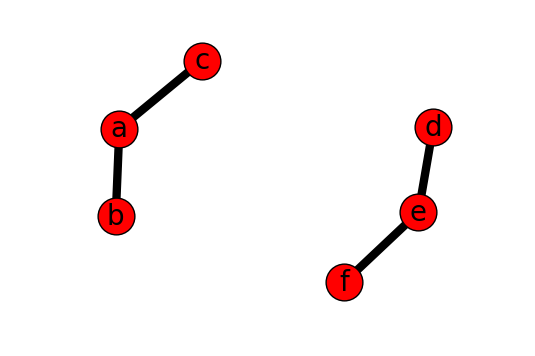

In [162]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()


nodes = ['a_1_start',
'a_1_end',  
'a_2_start',
'a_2_end' , 
'b_1_start',
'b_1_end',  
'b_2_start',
'b_2_end',  
'c_1_start',
'c_1_end',  
'c_2_start',
'c_2_end'] 


G.add_edge('a', 'b')
G.add_edge('a', 'c')
G.add_edge('d', 'e')
G.add_edge('e', 'f')
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
# edges
nx.draw_networkx_edges(G, pos, width=6)
# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
plt.axis('off')
plt.show()

In [528]:
Z_line_prim = np.array([[3+2.7j ,0.6j, 0.6j],
                        [0.6j, 3+2.7j, 0.6j],
                        [0.6j, 0.6j, 3+2.7j]]
                        )
Y_line_prim = np.linalg.inv(Z_line_prim)
Z_base = 22.863**2/1.0
Y_line_prim_pu = Y_line_prim*Z_base


Y_trafo_prim = 

In [530]:
Y_line_prim

array([[ 0.19044768-0.15809652j, -0.03326597-0.00149697j,
        -0.03326597-0.00149697j],
       [-0.03326597-0.00149697j,  0.19044768-0.15809652j,
        -0.03326597-0.00149697j],
       [-0.03326597-0.00149697j, -0.03326597-0.00149697j,
         0.19044768-0.15809652j]])

In [531]:
def diag_2d(Y_prim_list):

    N_cols = 0

    for Y_prim in Y_prim_list:
        N_cols += Y_prim.shape[1]

    Y_prims = np.zeros((N_cols,N_cols))+0j

    it = 0
    for Y_prim in Y_prim_list:
        N = Y_prim.shape[0] 
        Y_prims[it:(it+N),it:(it+N)] = Y_prim
        it += N

    return Y_prims

In [539]:
T_i_1ph = np.array([
[1., 1.],
[1., 1.]])

In [540]:
S_n = 25.0e3
Freq = 60.0
Omega = 2*np.pi*Freq
I_U_avg  =1.0 # Single
P_U = 1.0 # Single
I_mag_pu = 0.013
R_cc_pu = 0.011
X_cc_pu = 0.011
epsilon = np.abs(I_U_avg/I_mag_pu)

P_nl_loss = 118.0
P_nl_loss_pu = P_nl_loss/S_n

c = epsilon**2*P_nl_loss_pu/P_U
k = np.sqrt((epsilon**2-c**2)/Omega**2)

In [541]:
Z_prim_pu = (c+k*Omega*1j)*T_i_1ph + np.eye(2)*R_cc_pu*0.5 + 1j*np.eye(2)*X_cc_pu*0.5

In [546]:
Y_prim_pu_old = np.linalg.inv(Z_prim_pu)

In [547]:
LLN = np.array([[1.0/np.sqrt(3),0],
                [0,1.0/2]])

Y_prim_pu = 0.025/(1.0/3)*LLN @ Y_prim_pu_old @ LLN